## Considering the graph as districts of a city

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pickle

In [2]:
G = pickle.load(open('../Data/Districts_of_Gujarat.pickle', 'rb'))

In [3]:
assert(len(G.nodes)==33)
assert(len(G.edges)==71)

# Success

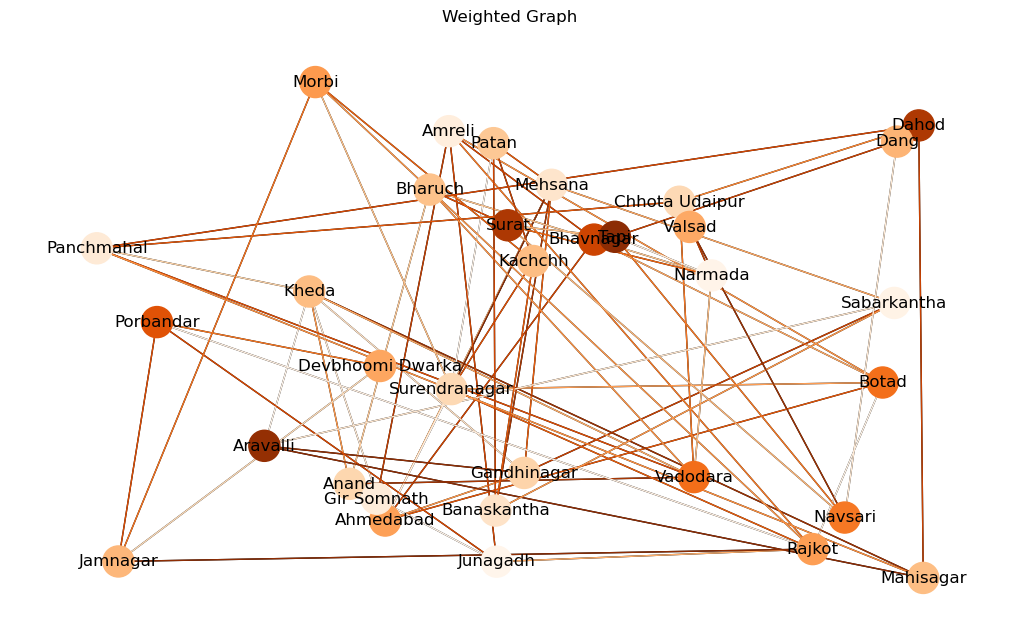

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Create a colormap based on the 'Population' values
populations = [data['Population'] for _, data in G.nodes(data=True)]
cmap = plt.get_cmap('Oranges_r')
node_colors = [cmap(population / max(populations)) for population in populations]

# Get edges
speed = [data['Speed'] for k,v, data in G.edges(data=True)]
edge_cmap = plt.get_cmap('Oranges')
edge_colors = [edge_cmap(s/max(speed)) for s in speed]

# Try random this time
pos = nx.random_layout(G)

# Plot the graph with edge weights
plt.figure(figsize=(10,6))
nx.draw(G, pos, with_labels=True, node_size=500, node_color=node_colors, font_size=12, font_color='black')
nx.draw_networkx_edges(G, pos, edge_color=edge_colors)
plt.title("Weighted Graph")
plt.show();


**Grey edges indicate a low speed while red indicate high speed. The opposite case is true for the nodes.**

In [5]:
G.nodes(data=True)

NodeDataView({'Ahmedabad': {'Population': 552393}, 'Anand': {'Population': 762365}, 'Bhavnagar': {'Population': 215098}, 'Botad': {'Population': 382736}, 'Gandhinagar': {'Population': 746187}, 'Kheda': {'Population': 656346}, 'Mehsana': {'Population': 839947}, 'Surendranagar': {'Population': 772478}, 'Amreli': {'Population': 907359}, 'Gir Somnath': {'Population': 894752}, 'Junagadh': {'Population': 967009}, 'Rajkot': {'Population': 546499}, 'Bharuch': {'Population': 672762}, 'Vadodara': {'Population': 378987}, 'Aravalli': {'Population': 66669}, 'Mahisagar': {'Population': 658660}, 'Sabarkantha': {'Population': 945715}, 'Banaskantha': {'Population': 828445}, 'Kachchh': {'Population': 655491}, 'Patan': {'Population': 696399}, 'Narmada': {'Population': 956861}, 'Surat': {'Population': 139560}, 'Chhota Udaipur': {'Population': 776701}, 'Dahod': {'Population': 142585}, 'Panchmahal': {'Population': 878866}, 'Dang': {'Population': 623775}, 'Navsari': {'Population': 413777}, 'Tapi': {'Populati

In [6]:
G.nodes['Ahmedabad']

{'Population': 552393}

In [7]:
nx.density(G) # The ration of 2*edges/n*n nodes is rather low. There are few edges in respect to the nodes

0.13446969696969696

In [8]:
# First the graph shall be 2-edge connected thus that one edge removal does not cause disconnection of any 2 nodes

%time

assert(nx.is_k_edge_connected(G, 2)==False)

edges_aug_2k = nx.k_edge_augmentation(G, 2) # consider the complement of G for completion

for edg in edges_aug_2k:
    print(edg)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.78 µs
('Dang', 'Valsad')


In [9]:
%time

assert(nx.is_k_edge_connected(G, 3)==False)

edges_aug_3k = nx.k_edge_augmentation(G, 3) # consider the complement of G for completion

CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 13.1 µs


In [10]:
new_edg = list(edges_aug_3k)
new_edg_r = [np.random.randint(0,101) for _ in new_edg]

new_edg_dict = dict(zip(new_edg, new_edg_r))

G.add_edges_from(new_edg_dict)

In [11]:
nx.is_k_edge_connected(G,3)
# Means G is not inseparable by removal of 2 edges

True

Note: For k>3 and large graphs this problem is hard to solve as it falls under the NP-complete problems.

In [12]:
# Test for communities: like modules in the brain, densely intraconnected subgraphs

# Look for centrality of nodes
nx.degree_centrality(G)

{'Ahmedabad': 0.21875,
 'Anand': 0.125,
 'Bhavnagar': 0.09375,
 'Botad': 0.15625,
 'Gandhinagar': 0.15625,
 'Kheda': 0.21875,
 'Mehsana': 0.1875,
 'Surendranagar': 0.21875,
 'Amreli': 0.15625,
 'Gir Somnath': 0.09375,
 'Junagadh': 0.125,
 'Rajkot': 0.21875,
 'Bharuch': 0.125,
 'Vadodara': 0.1875,
 'Aravalli': 0.125,
 'Mahisagar': 0.125,
 'Sabarkantha': 0.125,
 'Banaskantha': 0.125,
 'Kachchh': 0.125,
 'Patan': 0.125,
 'Narmada': 0.15625,
 'Surat': 0.125,
 'Chhota Udaipur': 0.125,
 'Dahod': 0.09375,
 'Panchmahal': 0.15625,
 'Dang': 0.09375,
 'Navsari': 0.125,
 'Tapi': 0.125,
 'Devbhoomi Dwarka': 0.09375,
 'Jamnagar': 0.125,
 'Porbandar': 0.125,
 'Morbi': 0.125,
 'Valsad': 0.125}

In [13]:
# There are 4-5 more central nodes
nx.betweenness_centrality(G) # We find 'Ahmedabad' is a central node which is part of many shortest paths in the graph

{'Ahmedabad': 0.3112676792557011,
 'Anand': 0.10845367472502197,
 'Bhavnagar': 0.03149422624339607,
 'Botad': 0.08552868634106775,
 'Gandhinagar': 0.04386351314719435,
 'Kheda': 0.2063501561426134,
 'Mehsana': 0.07537457436354497,
 'Surendranagar': 0.1833475035532673,
 'Amreli': 0.07828951567091984,
 'Gir Somnath': 0.05750216570010212,
 'Junagadh': 0.015714186127492577,
 'Rajkot': 0.13488903437907232,
 'Bharuch': 0.0654225699321762,
 'Vadodara': 0.10936290510827984,
 'Aravalli': 0.028322903574919695,
 'Mahisagar': 0.027723519759810078,
 'Sabarkantha': 0.024048546593613006,
 'Banaskantha': 0.012503533916010195,
 'Kachchh': 0.022994789971782382,
 'Patan': 0.0045759236283429835,
 'Narmada': 0.09837313652244865,
 'Surat': 0.055636587479566596,
 'Chhota Udaipur': 0.02874886024791148,
 'Dahod': 0.004553874335658016,
 'Panchmahal': 0.03874132436454542,
 'Dang': 0.021670139830125598,
 'Navsari': 0.06541665725429956,
 'Tapi': 0.056126988918734654,
 'Devbhoomi Dwarka': 0.0605889686030815,
 'Jamn

In [14]:
# Community finding
G_comm = nx.community.girvan_newman(G)
type(G_comm) # is ordered from best to less and less good
next(G_comm)

({'Ahmedabad',
  'Amreli',
  'Aravalli',
  'Banaskantha',
  'Bhavnagar',
  'Botad',
  'Devbhoomi Dwarka',
  'Gandhinagar',
  'Gir Somnath',
  'Jamnagar',
  'Junagadh',
  'Kachchh',
  'Mehsana',
  'Morbi',
  'Patan',
  'Porbandar',
  'Rajkot',
  'Sabarkantha',
  'Surendranagar',
  'Valsad'},
 {'Anand',
  'Bharuch',
  'Chhota Udaipur',
  'Dahod',
  'Dang',
  'Kheda',
  'Mahisagar',
  'Narmada',
  'Navsari',
  'Panchmahal',
  'Surat',
  'Tapi',
  'Vadodara'})

In [15]:
next(G_comm)

({'Ahmedabad',
  'Amreli',
  'Bhavnagar',
  'Botad',
  'Devbhoomi Dwarka',
  'Gir Somnath',
  'Jamnagar',
  'Junagadh',
  'Morbi',
  'Porbandar',
  'Rajkot',
  'Surendranagar',
  'Valsad'},
 {'Anand',
  'Bharuch',
  'Chhota Udaipur',
  'Dahod',
  'Dang',
  'Kheda',
  'Mahisagar',
  'Narmada',
  'Navsari',
  'Panchmahal',
  'Surat',
  'Tapi',
  'Vadodara'},
 {'Aravalli',
  'Banaskantha',
  'Gandhinagar',
  'Kachchh',
  'Mehsana',
  'Patan',
  'Sabarkantha'})

A more balanced and less central set of communites (3:2) is prefered by me (lower). 

In [16]:
# Another approach with this
G_comm_gred = nx.community.greedy_modularity_communities(G)
type(G_comm_gred)

list

In [17]:
# Each district is part of one community --> This is most desirable!
G_comm_gred

[frozenset({'Ahmedabad',
            'Banaskantha',
            'Bhavnagar',
            'Botad',
            'Gandhinagar',
            'Kachchh',
            'Mehsana',
            'Patan',
            'Sabarkantha',
            'Surendranagar'}),
 frozenset({'Anand',
            'Aravalli',
            'Bharuch',
            'Chhota Udaipur',
            'Dahod',
            'Kheda',
            'Mahisagar',
            'Narmada',
            'Panchmahal',
            'Vadodara'}),
 frozenset({'Amreli',
            'Devbhoomi Dwarka',
            'Gir Somnath',
            'Jamnagar',
            'Junagadh',
            'Morbi',
            'Porbandar',
            'Rajkot'}),
 frozenset({'Dang', 'Navsari', 'Surat', 'Tapi', 'Valsad'})]

Using the efficiency module of networkx:

In [18]:
nx.global_efficiency(G)

0.4166666666666644

In [100]:
Popl = []
for index, i in enumerate(G_comm_gred):
    Popl.append({sum([d['Population'] for n, d in nx.subgraph(G, G_comm_gred[index]).nodes(data=True)])})

In [45]:
for index, i in enumerate(G_comm_gred):
    print(f'Global efficiency of subgraph G0{index+1}: {nx.global_efficiency(nx.subgraph(G,list(i)))}; Local population: {Popl[index]}')

Global efficiency of subgraph G01: 0.6851851851851851; Local population: {6634889}
Global efficiency of subgraph G02: 0.6851851851851852; Local population: {5950802}
Global efficiency of subgraph G03: 0.7083333333333333; Local population: {5334009}
Global efficiency of subgraph G04: 0.85; Local population: {1807382}


Improvemenrs to the whole, but what does this even mean!? --> *The efficiency of a pair of nodes in a graph is the multiplicative inverse of the shortest path distance between the nodes*. Next: Finding a method to iteratively increase the global and local efficiency. 

In [ ]:
# Modify graph (or create new) that reflects this new attributes
# Each node shall have attr district

list(G_comm_gred[0]) # with this format add to G

for index, i in enumerate(G_comm_gred):
    attr = dict(zip(list(G_comm_gred[index]),list(np.zeros(len(list(G_comm_gred[index])), dtype=int)+index+1)))
    if not nx.get_node_attributes(G, 'District') == {}:
        nx.set_node_attributes(G, attr, 'District')

Two things are to be noted:
- The global efficiency is below each local efficiency.
- The population of each district should determine its local efficiency increase.

---> Goal: equalize gloabl to local while improving local depending on poplulation niveau.

In [101]:
# Unset values and make dict
Popniveau = [value.pop() for value in Popl]
Pop_niveau_dict = dict(zip([1,2,3,4], Popniveau))
Pop_niveau_dict

{1: 6634889, 2: 5950802, 3: 5334009, 4: 1807382}

**To increase global_efficiency(G(V,E))** 

Pseudo-code:

$e_{new} = PriorityQueue$\
$E_{increase} = 0$

**while** $E_{global} < E_{local}(i) \forall i$ **do**:
   >$\forall e(u,v) \in G(V,K/E)$:
        >>**calc** $E(u,v)$\
        >>$E_{globalnew} = \sqrt{U[Population]+V[Population]}\cdot E(u,v)$\
        >>**if** $E_{globalnew} > E_{increase}$:
            >>>$E_{increase} = E_{globalnew}$\
            >>>$e_{new} = promote(u,v)$
>        >
        >**else** insert $E_{globalnew}$
>        
>
>
   >**add** $e_{new}$ to **G**
